## Laboratorio #1

Estudiante: Roy Esteban Padilla Calderón.

Carné: B85854.

1. Implemente un método que cargue el set de datos a memoria (puede utilizar la
biblioteca pandas para esto). Revise el contenido del set de datos. Elimine las
columnas que considere que no son relevantes para su análisis y utilice
documentación interna para justificar su razonamiento. Luego con las columnas
restantes elimine cualquier entrada que posea datos faltantes. Utilice one-hot
encoding para convertir las variables categóricas en variables numéricas.

In [1]:
import pandas as pd

# Carga del archivo
def getDatos(nombre):
  return pd.read_csv(nombre)

df = getDatos('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
valores_unicos_ticket = df['Ticket'].nunique()
print("Valores únicos de Ticket:",valores_unicos_ticket)

valores_unicos_cabin = df['Cabin'].nunique()
print("Valores únicos de Ticket:",valores_unicos_cabin)

Valores únicos de Ticket: 929
Valores únicos de Ticket: 186


Se eliminan las siguientes columnas:


*   *PassengerId / Name*: para el análisis se busca encontrar un comportamiento de grupos, por lo que no se considera necesario el identificador único y nombre del pasajero al ser tantos valores distintos.
*   *Ticket, Cabin*: de la manera similar que con PassengerId y Name, ticket contiene 929 y cabin 186 valores únicos, por lo que se considera que esta columna no aporta mucho al análisis del grupo, además, aplicar la división en one-hot encoding provocaría que se aumente la dimensionalidad por lo que haría el análisis más complejo.
*   *Embarked*: se elimina ya que se considera que no sea de relevancia para el análisis el lugar donde un pasajero haya embarcado.






In [3]:
# Eliminación de las columnas
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'])

# Eliminación de filas con datos NaN (datos faltantes en la carga)
df = df.dropna()

# Se pasan a one-hot encoding las columnas 'Pclass','Sex' y 'Survived'
df = pd.get_dummies(df,columns=['Pclass','Sex', 'Survived'])
df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survived_0,Survived_1
0,22.0,1,0,7.2500,0,0,1,0,1,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,0,1
2,26.0,0,0,7.9250,0,0,1,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,1,0


2. Convierta los datos obtenidos en el punto anterior en una matriz de numpy.

In [4]:
import numpy as np

# Conversión
matriz_numpy = df.to_numpy()

3. Implemente una clase llamada myPCA que permita recibir una matriz numpy de datos y obtener la matriz de componentes principales C, así como las inercias y los puntos necesarios para dibujar el círculo de correlación. Este método debe implementarlo usted, por lo que no se permitirá el uso de la biblioteca scikit-learn ni ninguna otra que permita ejecutar PCA de manera directa.

In [5]:
# Clase myPCA
class myPCA:
  def __init__(self, matriz_numpy):
    self.matriz_numpy = matriz_numpy

  def getPCA(self):
    # Centrar y reducir la matriz
    matriz_centrada = self.__getMatCentrada()
    
    # Calcular la matriz de correlaciones
    matriz_correlaciones = self.__getMatCorrelaciones(matriz_centrada)

    # Calcular los valores y vectores propios. 
    valores_propios = np.linalg.eigh(matriz_correlaciones)[0]
    vectores_propios = np.linalg.eigh(matriz_correlaciones)[1]

    # Ordene los valores y vectores propios de mayor a menor, formando la matriz V
    matriz_V, valores_propios_ordenados = self.__getMatV(valores_propios, vectores_propios)

    # Puede calcular C realizando la multiplicación X * V
    matriz_C = np.matmul(matriz_centrada, matriz_V)

    # Las inercia de cada componente principal corresponde a su valor propio
    # dividido entre el total de variables (m).
    inercias = self.__getInercias(matriz_C, valores_propios_ordenados)

    # Los puntos necesarios del círculo de correlación corresponden a los valores
    # de la matriz V, en las columnas 0 y 1 para todas las filas.
    puntos_correlacion = self.__getPuntosCorrelacion(matriz_V, valores_propios_ordenados)
    
    return matriz_C, inercias, puntos_correlacion, matriz_V

  def __getMatCentrada(self):
    # Método para centrar la matriz y reducir la matriz_numpy siguiendo la fórmula:
    # x’ = (x - μ)/σ con x: matriz, μ: media o promedio y σ: desviación estándar
    media = np.mean(self.matriz_numpy, axis=0)
    std = np.std(self.matriz_numpy, axis=0)
    return (matriz_numpy - media)/std

  def __getMatCorrelaciones(self, matriz_centrada):
    # Método para calcular la matriz de correlaciones a partir de la siguiente fórmula:
    # 1/n * Xt X, con X: matriz centrada y reducida y n: cantidad de entradas o filas de la matriz
    n = np.shape(matriz_centrada)[0]
    transpuesta = matriz_centrada.transpose()
    return np.matmul(transpuesta, matriz_centrada)/n

  def __getMatV(self, valores_propios, vectores_propios):
    # Método para calcular la matriz V, donde se ordenan los vectores propios en función del peso
    # mostrado por sus respectivos valores propios de mayor a menor.
    valores_abs = np.absolute(valores_propios)
    V = np.zeros(shape=vectores_propios.shape)
    valores_propios_ordenados = np.array([])
    # Ordenamiento de mayor a menor : generación de la matriz V
    for index in range(len(valores_abs)):
      # valor máximo
      valor_maximo = max(valores_abs)
      # obtención del índice
      indice_max = np.where(valores_abs == valor_maximo)[0][0]
      # guardado de los valores propios ordenados
      valores_propios_ordenados = np.append(valores_propios_ordenados, valores_propios[indice_max])
      # se pone como -1 el máximo para que se vuelva a tomar en cuenta
      valores_abs[indice_max] = -1
      # se agrega el vector asociado al valor propio máximo a la matriz V
      V[:,index] = vectores_propios[:,indice_max]# = np.append(V, vectores_propios[indice_max])
    
    return V, valores_propios_ordenados

  def __getInercias(self, matriz_C, valores_propios):
    # Método para calcular las inercias con la fórmula λn / m
    # obtención del m
    m = np.shape(matriz_C)[1]
    inercias = []
    for valor_propio in valores_propios:
      inercias.append(valor_propio/m)
    return inercias
  
  def __getPuntosCorrelacion(self, matriz_V, valores_propios):
    # Los puntos necesarios del círculo de correlación corresponden a los valores
    # de la matriz V, en las columnas 0 y 1 para todas las filas. Estos valores deben
    # ir multiplicados por la raíz cuadrada de su valor propio correspondiente.
    # matriz para guardar 
    puntos = np.zeros((np.shape(matriz_V)[0], 2))
    puntos[:, 0] = matriz_V[:,0] * np.sqrt(valores_propios[0])
    puntos[:, 1] = matriz_V[:,1] * np.sqrt(valores_propios[1])
    return puntos

pca = myPCA(matriz_numpy)
matriz_C, inercias, correlaciones, matriz_V = pca.getPCA()


4. Utilice la clase implementada para ejecutar el algoritmo PCA con los datos obtenidos de titanic.csv. Grafique los datos sobre sus componentes principales y coloree los puntos según su valor “Survived”. Grafique el círculo de correlación del modelo.


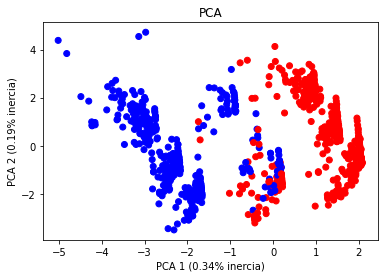

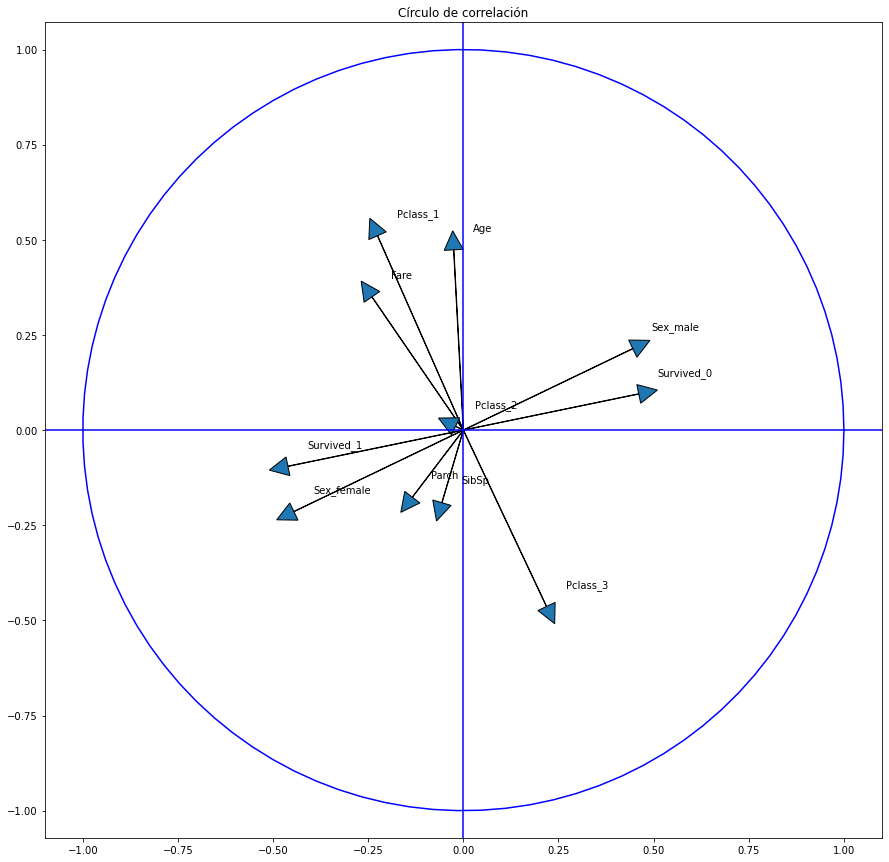

In [6]:
import matplotlib.pyplot as plt

# Plano de las componentes principales
plt.scatter(np.ravel(matriz_C[:,0]),np.ravel(matriz_C[:,1]),c = ['b' if i==1 else 'r' for i in df['Survived_1']])
plt.xlabel('PCA 1 (%.2f%% inercia)' % (inercias[0],))
plt.ylabel('PCA 2 (%.2f%% inercia)' % (inercias[1],))
plt.title('PCA')
plt.show()

# Círculo de correlación
plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, df.shape[1]):
	plt.arrow(0,0, matriz_V[i, 0],  # x - PC1
              	matriz_V[i, 1],  # y - PC2
              	head_width=0.05, head_length=0.05)
	plt.text(matriz_V[i, 0] + 0.05, matriz_V[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b")  # Circle
plt.axis('equal')
plt.title('Círculo de correlación')
plt.show()


5. Agregue en documentación interna lo que muestran estos gráficos. ¿Cuántos grupos de datos parece haber?¿Qué comportamientos se pueden observar? ¿Qué podría explicar estos comportamientos? ¿Qué nos indica el círculo de correlación?


En el plano de componentes principales se tiene que el PCA representa prácticamente el 53 % de los datos (34% de inercia de la primer columna más 19% de la segunda), dicho esto, se notan tres divisiones o grupos, en los laterales del eje x (PCA 1), en el lado izquierdo está un grupo con los que sobrevivieron (color azul) y al lado derecho los que no (color rojo), finalmente en el medio se nota que existe un comportamiento en el que se mezclan el sobrevivir con el no, por lo que esto formaría un grupo, por lo tanto tendríamos tres agrupaciones.
En cuanto al círculo de correlación se puede observar que existe una gran correlación entre sobrevivir (Survived) y ser del sexo femenino (Sex_female), por otra parte existe una alta correlación entre no sobrevivir y ser del sexo masculino por lo que se nota que el sexo está sumamente relacionado con la probabilidad de sobrevivir. Este comportamiento se relaciona con los grupos de los laterales explicados anteriormente en el gráfico de dispersión, donde en el grupo del lado izquierdo pertenece la correlacion de ser sexo femenino y supervivientes y su contraparte del lado derecho, finalmente en cuanto al grupo central de dicho gráfico, parece que se explica analizando el círculo de correlación, donde la primera clase (Pclass_1) juega un papel al permitir esta  maximizar las probabilidades de sobrevivir mientras que ser de la tercera clase (Pclass_3) minimiza dicha probabilidad.

6. Si yo fuera un pasajero del Titanic, ¿qué atributos o características maximizarían mi probabilidad de sobrevivencia?

Según en análisis del punto 5, las caracterísiticas que maximizarían la probabilidad de sobrevivir son las de pertener al sexo femenino ya que parece esta ser la que tiene mayor influencia en dicha probabilidad y en menor medida pertenecer a primera clase.

7. Por motivos de verificación, repita el experimento pero esta vez utilizando la biblioteca scikit-learn (sklearn). Nuevamente, vuelva a cargar el documento y realice el proceso para ejecutar el algoritmo haciendo uso de la poderosa biblioteca sklearn. Grafique nuevamente los datos sobre sus componentes principales haciendo uso del coloreo y también grafique el círculo de correlación del modelo.

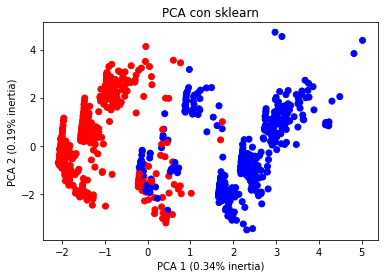

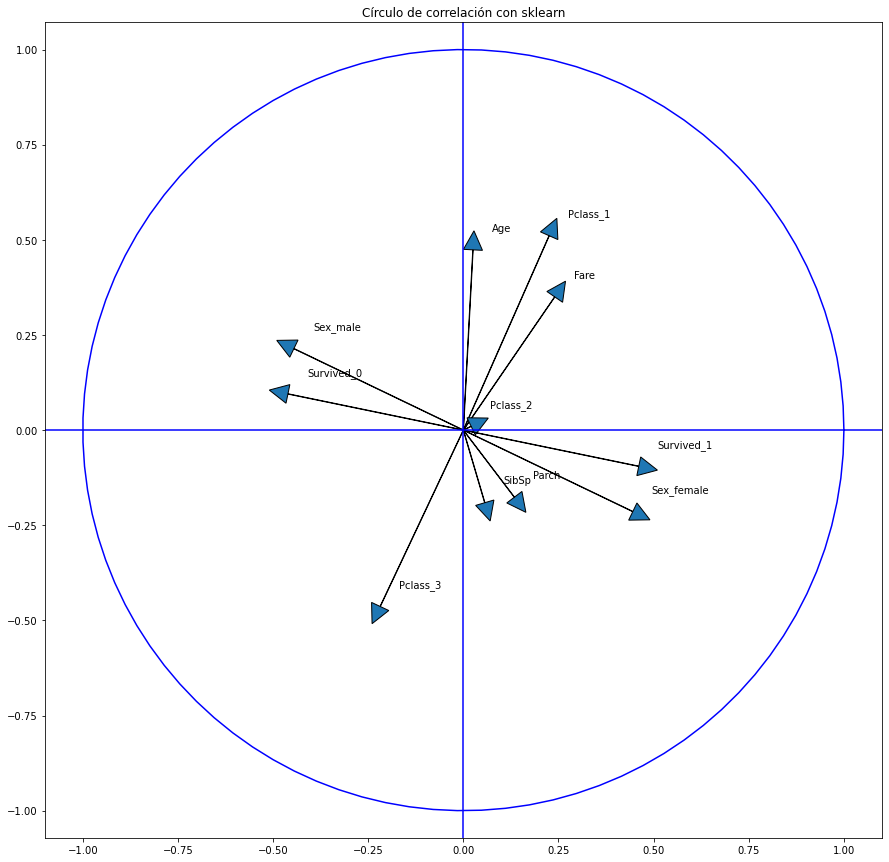

In [7]:
sklearn_df = getDatos('titanic.csv')

# Eliminación de las columnas
sklearn_df = sklearn_df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'])

# Eliminación de filas con datos NaN (datos faltantes en la carga)
sklearn_df = sklearn_df.dropna()

# Se pasan a one-hot encoding las columnas 'Pclass','Sex' y 'Embarked'
sklearn_df = pd.get_dummies(sklearn_df,columns=['Pclass','Sex', 'Survived'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(sklearn_df)

from sklearn.decomposition import PCA
pca = PCA()
sklearn_C = pca.fit_transform(df_scaled)

inertia = pca.explained_variance_ratio_
V = pca.transform(np.identity(df_scaled.shape[1]))

# Plano de las componentes principales
plt.scatter(np.ravel(sklearn_C[:,0]),np.ravel(sklearn_C[:,1]),c = ['b' if i==1 else 'r' for i in sklearn_df["Survived_1"]])
plt.xlabel('PCA 1 (%.2f%% inertia)' % (inertia[0],))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (inertia[1],))
plt.title('PCA con sklearn')
plt.show()

# Círculo de correlación
plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, sklearn_df.shape[1]):
	plt.arrow(0,0, V[i, 0],  # x - PC1
              	V[i, 1],  # y - PC2
              	head_width=0.05, head_length=0.05)
	plt.text(V[i, 0] + 0.05, V[i, 1] + 0.05, sklearn_df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b")  # Circle
plt.axis('equal')
plt.title('Círculo de correlación con sklearn')
plt.show()

8. ¿Hay alguna diferencia entre las gráficas? De ser así, ¿por qué cree que ocurrió esto? ¿Impacta el resultado de alguna manera?

En efecto existe una diferencia en los gráficos del resultado obtenido por la implementación de la clase y la de *sklearn* donde parece que cambia el ángulo en el que son vistos los datos, esto puede deberse a las transformaciones de los vectores y valores propios en el procedimiento ya que según lo observado puede que el uso del valor absoluto por parte de la librería puede provoque que se estén invirtiendo los signos por lo que se tienen comportamientos como si estos se reflejaran en "espejo". En el fondo esto realmente no produce un impacto en el resultado como tal del análisis ya que el comportamiento de los grupos es muy similar, únicamente cambia la dirección en la cual son vistos los datos por lo que los comportamientos de los grupos en el PCA y en el círculo de correlaciones son prácticamente los mismos.